In [39]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

application_data=pd.read_csv('/content/drive/MyDrive/dataset/application_record.csv')
print(np.shape(application_data))
application_data.head()



(438557, 18)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [8]:
rec_data=pd.read_csv('/content/drive/MyDrive/dataset/credit_record.csv')
rec_data.head()



,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [9]:
print(np.shape(application_data))
application_data.nunique()


(438557, 18)


ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

In [10]:
print(np.shape(rec_data))
rec_data.nunique()

(1048575, 3)


ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64

In [11]:
rec_data.duplicated().sum()

0

as we can see in record table , there are more rows than unique id , but there are none duplicated entries , which means....

In [12]:
rec_data.duplicated(subset='ID').sum()

1002590

record table contains different information for same customerid

In [13]:
application_data.isnull().sum()


ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [14]:
application_data['OCCUPATION_TYPE'].fillna(value='other' , inplace=True)
application_data.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [15]:
app = application_data 


In [16]:
app.head(2)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,other,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,other,2.0


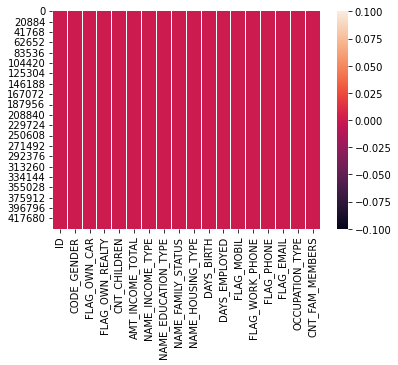

In [17]:
app.dropna(inplace=True)
app.isnull().any()
sn.heatmap(app.isnull())

In [18]:
new_app_data=app

## replacing all possible characters to number

In [19]:
new_app_data.head(2)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,other,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,other,2.0


In [20]:
new_app_data["CODE_GENDER"].replace(['F','M'],[0,1],inplace=True)
new_app_data.head(2)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,1,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,other,2.0
1,5008805,1,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,other,2.0


In [21]:
new_app_data["FLAG_OWN_CAR"].replace(["Y","N"],[1,0],inplace=True)
new_app_data["FLAG_OWN_REALTY"].replace(["Y","N"],[1,0],inplace=True)
new_app_data.head(2)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,other,2.0
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,other,2.0


In [22]:
new_app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  int64  
 2   FLAG_OWN_CAR         438557 non-null  int64  
 3   FLAG_OWN_REALTY      438557 non-null  int64  
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

changing the data types

In [23]:
new_app_data['FLAG_OWN_CAR'] = new_app_data['FLAG_OWN_CAR'].astype(bool)
new_app_data['FLAG_OWN_REALTY']=new_app_data['FLAG_OWN_REALTY'].astype(bool)
new_app_data['CNT_FAM_MEMBERS']=new_app_data['CNT_FAM_MEMBERS'].astype(int)
new_app_data['FLAG_EMAIL']=new_app_data['FLAG_EMAIL'].astype(bool)
new_app_data['FLAG_PHONE']=new_app_data['FLAG_PHONE'].astype(bool)
new_app_data['FLAG_WORK_PHONE']=new_app_data['FLAG_WORK_PHONE'].astype(bool)
new_app_data['FLAG_MOBIL']=new_app_data['FLAG_MOBIL'].astype(bool)
new_app_data.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  int64  
 2   FLAG_OWN_CAR         438557 non-null  bool   
 3   FLAG_OWN_REALTY      438557 non-null  bool   
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  bool   
 13  FLAG_WORK_PHONE      438557 non-null  bool   
 14  FLAG_PHONE           438557 non-null  bool   
 15  FLAG_EMAIL       

In [24]:
new_app_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,1,True,True,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,True,True,False,False,other,2
1,5008805,1,True,True,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,True,True,False,False,other,2
2,5008806,1,True,True,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,True,False,False,False,Security staff,2
3,5008808,0,False,True,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,True,False,True,True,Sales staff,1
4,5008809,0,False,True,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,True,False,True,True,Sales staff,1


cleaning the second table , making all values of status col integer as it contains some characters AND
making all values of month col positive

In [25]:
rec_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [26]:
rec_data['STATUS'].replace('X', 6, inplace=True)
rec_data['STATUS'].replace('C', 7, inplace=True)
rec_data['STATUS']=rec_data['STATUS'].astype(int)



In [27]:
rec_data['MONTHS_BALANCE']= -rec_data['MONTHS_BALANCE']


In [28]:
rec_data.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,6
1,5001711,1,0
2,5001711,2,0
3,5001711,3,0
4,5001712,0,7


In [29]:
final_data=pd.merge(new_app_data, rec_data, how='inner', on=['ID'])
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  int64  
 2   FLAG_OWN_CAR         777715 non-null  bool   
 3   FLAG_OWN_REALTY      777715 non-null  bool   
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  bool   
 13  FLAG_WORK_PHONE      777715 non-null  bool   
 14  FLAG_PHONE           777715 non-null  bool   
 15  FLAG_EMAIL       

In [30]:
final_data.head()
data=final_data

In [31]:
final_data=final_data.drop(columns='CODE_GENDER')
final_data.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,True,True,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,True,True,False,False,other,2,0,7
1,5008804,True,True,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,True,True,False,False,other,2,1,7
2,5008804,True,True,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,True,True,False,False,other,2,2,7
3,5008804,True,True,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,True,True,False,False,other,2,3,7
4,5008804,True,True,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,True,True,False,False,other,2,4,7


In [32]:
final_data['DAYS_BIRTH']=-final_data['DAYS_BIRTH']/365.2425


In [33]:
final_data.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,True,True,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.868574,-4542,True,True,False,False,other,2,0,7
1,5008804,True,True,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.868574,-4542,True,True,False,False,other,2,1,7
2,5008804,True,True,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.868574,-4542,True,True,False,False,other,2,2,7
3,5008804,True,True,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.868574,-4542,True,True,False,False,other,2,3,7
4,5008804,True,True,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.868574,-4542,True,True,False,False,other,2,4,7


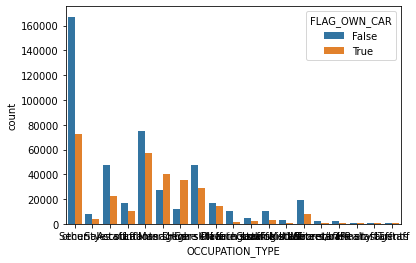

In [37]:
sns.countplot(x='OCCUPATION_TYPE',hue='FLAG_OWN_CAR',data=final_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


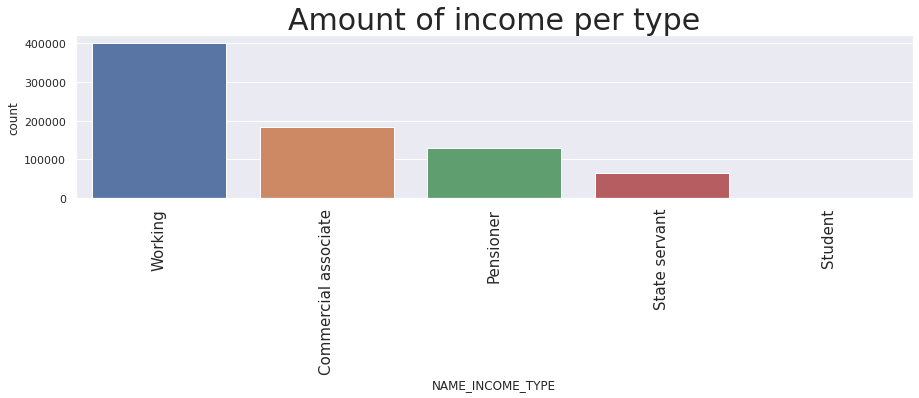

In [40]:
sns.set(rc={'figure.figsize':(15,3)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(final_data['NAME_INCOME_TYPE'],hue_order=final_data.groupby('NAME_INCOME_TYPE'))
p.axes.set_title("Amount of income per type",fontsize=30)
plt.show()

(2.544, 18.18]      472222
(18.18, 33.66]      246863
(33.66, 49.14]       47802
(49.14, 64.62]        5746
(64.62, 80.1]         3512
(80.1, 95.58]         1209
(95.58, 111.06]         26
(111.06, 126.54]        83
(126.54, 142.02]       102
(142.02, 157.5]        150
Name: AMT_INCOME_TOTAL, dtype: int64


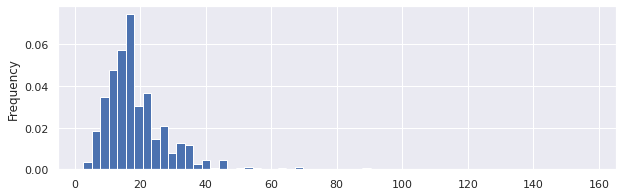

In [41]:
sns.set(rc={'figure.figsize':(10,3)})
final_data['AMT_INCOME_TOTAL']=final_data['AMT_INCOME_TOTAL'].astype(object)
final_data['AMT_INCOME_TOTAL'] = final_data['AMT_INCOME_TOTAL']/10000 
print(final_data['AMT_INCOME_TOTAL'].value_counts(bins=10,sort=False))
final_data['AMT_INCOME_TOTAL'].plot(kind='hist',bins=60,density=True)
plt.show()

(-1.0010999999999999, -1.0008]    0.0
(-1.0008, -1.0006]                0.0
(-1.0006, -1.0004]                0.0
(-1.0004, -1.0002]                0.0
(-1.0002, -1.0]                   1.0
(-1.0, -0.9998]                   0.0
(-0.9998, -0.9996]                0.0
(-0.9996, -0.9994]                0.0
(-0.9994, -0.9992]                0.0
(-0.9992, -0.999]                 0.0
Name: Age, dtype: float64


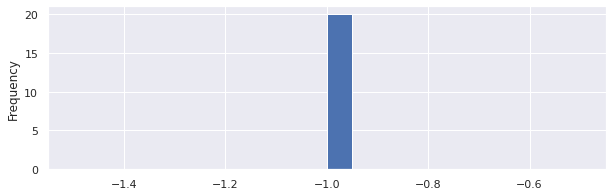

In [44]:
sns.set(rc={'figure.figsize':(10,3)})
final_data['Age']=-(final_data['DAYS_BIRTH'])//365	
print(final_data['Age'].value_counts(bins=10,normalize=True,sort=False))
final_data['Age'].plot(kind='hist',bins=20,density=True)
plt.show()